In [0]:
import io
import pandas as pd
from google.colab import files
import numpy as np
import matplotlib.pylab as plt
from scipy.optimize import curve_fit
import math


plt.rc('legend', fontsize=18)
plt.rc('axes', labelsize=20)
plt.rc('xtick', labelsize=20)
plt.rc('ytick', labelsize=20)

font = {'family' : 'serif',
        'weight' : 'normal'}

plt.rc('font', **font)

In [0]:
#Cargamos los archivos desde el panel izquierdo y después corremos este código
resistencias=[564 ,564	,68	,562	,560	,563	,568	,563	,563	,563	,565	,562	,565	,68	,565	,68	] #Chequear el valor de las resistencias de S2, S13 y S15
err_R=[2,1,2,2,2,2,2,2,2,1,1,1,2,2,2,1]
#sensdata = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15] 
sensdata= [1,2,3,4,6]
data = []
databis = []
dataAux = []
dataAuxbis = []


#Tiempo V_Vernier V_Sensor-Cuadrado

for i in sensdata:
  data.append(np.loadtxt('aux3fuerza{}'.format(i)))

data.append(np.loadtxt('S0fuerza5'))
#  databis.append(np.loadtxt('cuadradoS{}bis'.format(i)))
#sensdataAux = [1,2,3]
#for j in sensdataAux:
#  dataAux.append(np.loadtxt('cuadrado_aux{}'.format(j)))

#sensdataAuxbis = [2,3]
#for k in sensdataAuxbis:
#  dataAuxbis.append(np.loadtxt('cuadrado_aux{}bis'.format(k)))
  

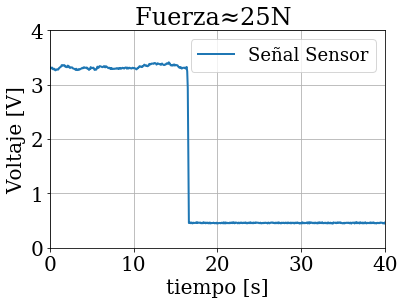

In [17]:
plt.plot(data[5][500:,0]-data[5][500,0],data[5][500:,2],linewidth=2,label='Señal Sensor')
plt.title('Fuerza≈25N ', fontsize=24)
plt.xlim(0,40)
plt.ylim(0,4)
plt.xlabel('tiempo [s]')
plt.ylabel('Voltaje [V]')
plt.grid()
plt.legend()

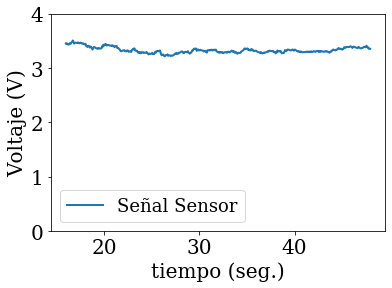

In [4]:
plt.plot(data[5][240:720,0],data[5][240:720,2],linewidth=2,label='Señal Sensor')
#plt.xlim(0,40)
plt.ylim(0,4)
plt.xlabel('tiempo (seg.)')
plt.ylabel('Voltaje (V)')
plt.legend()

In [0]:
np.std(data[5][240:720,2])

0.05471602436946604

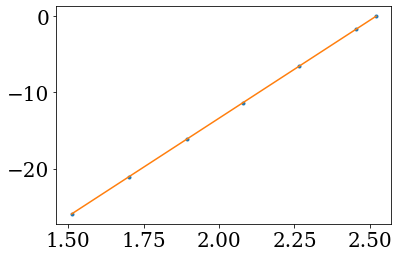

In [5]:
vol=[2.52022,
2.45485,
2.26456,
2.07816,
1.8924,
1.70212,
1.51183]

fuer=[0,
-1.66727,
-6.56404,
-11.3778,
-16.16294,
-21.05775,
-25.95471]

p=np.polyfit(vol,fuer,1)
p

plt.plot(vol,fuer,'.')
plt.plot(vol,np.polyval(p,vol))

In [6]:
p

array([ 25.75062466, -64.88787502])

In [0]:
#Fuerza en función de la lectura
orde, errorde = -64.88787502, 1.60681
pend, errpend = 25.75062466, 0.63589

def fuerza(volt):
  a = 25.75062466 #26.74#26.78885525
  b = -64.88787502, #-67.4 #-67.40046261
  sigma_a = 0.63589 #0.01 #0.05
  sigma_b = 1.60681 #0.02 #0.05
  f = a*volt + b
  return f

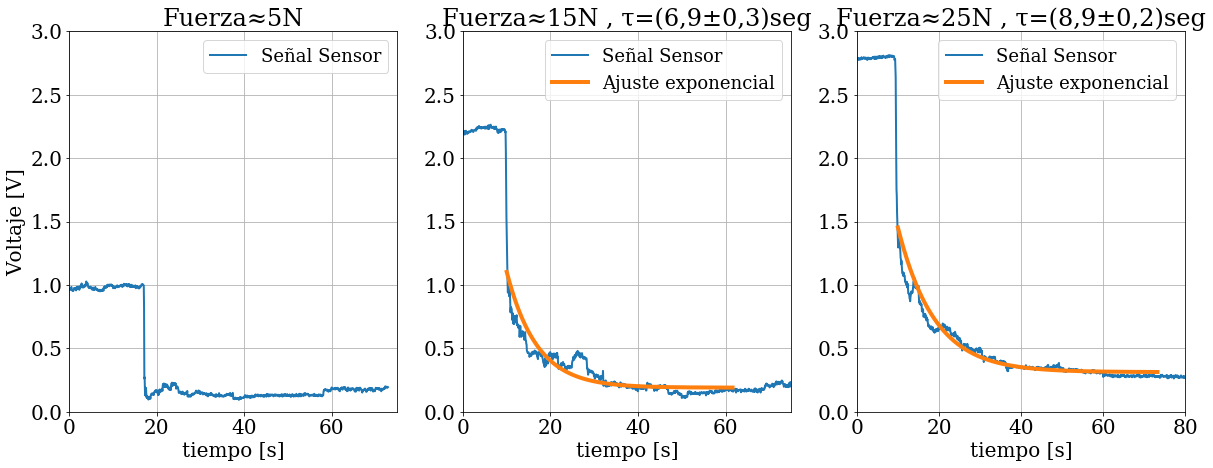

In [13]:
plt.figure(figsize=(20,7))
plt.subplot(1,3,1)
plt.title('Fuerza≈5N',fontsize=24)
plt.plot(data[0][:,0]-data[0][300,0],data[0][:,2],linewidth=2,label='Señal Sensor')
plt.xlim(0,75)
plt.ylim(0,3)
plt.xlabel('tiempo [s]')
plt.ylabel('Voltaje [V]')
plt.grid()
plt.legend()
plt.subplot(1,3,2)
plt.title('Fuerza≈15N , τ=(6,9±0,3)seg',fontsize=24)
plt.plot(data[1][:,0]-data[1][1030,0]+10,data[1][:,2],linewidth=2,label='Señal Sensor')
plt.plot(tbajada2+10,expo(tbajada2,parametrosbajada2[0],parametrosbajada2[1],parametrosbajada2[2]),'-',linewidth=4,label='Ajuste exponencial')
plt.xlabel('tiempo [s]')
plt.grid()
plt.xlim(0,75)
plt.ylim(0,3)
plt.legend()
plt.subplot(1,3,3)
plt.title('Fuerza≈25N , τ=(8,9±0,2)seg',fontsize=24)
plt.plot(data[3][:,0]-data[3][1059,0]+10,data[3][:,2],linewidth=2,label='Señal Sensor')
plt.plot(tbajada+10,expo(tbajada,parametrosbajada[0],parametrosbajada[1],parametrosbajada[2]),'-',linewidth=4,label='Ajuste exponencial')
plt.xlabel('tiempo [s]')
plt.grid()
plt.xlim(0,80)
plt.ylim(0,3)
plt.legend()

In [0]:

tsubida=data[3][218:1049,0]-data[3][218,0]
vsubida=data[3][218:1049,2]

tbajada=data[3][1050:2000,0]-data[3][1050,0]
vbajada=data[3][1050:2000,2]



tbajada2=data[1][1025:1800,0]-data[1][1025,0]
vbajada2=data[1][1025:1800,2]

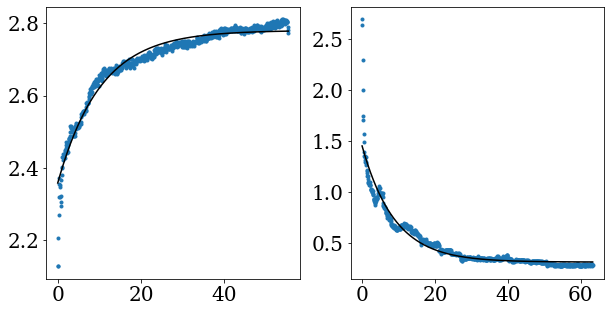

In [11]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.plot(tsubida,vsubida,'.')
plt.plot(tsubida,expo(tsubida,parametrossubida[0],parametrossubida[1],parametrossubida[2]),'k-')

plt.subplot(1,2,2)
plt.plot(tbajada,vbajada,'.')
plt.plot(tbajada,expo(tbajada,parametrosbajada[0],parametrosbajada[1],parametrosbajada[2]),'k-')


In [10]:
parametrossubida,parametrosbajada,parametrosbajada2

([2.3585253920215807, -0.42124116775709647, 10.243205572053542],
 [1.4536588995912836, 1.1407970818413413, 8.900256324080093],
 [1.1029534171981203, 0.912530468125763, 6.859079986911946])

In [9]:

def expo(x, d, e, f):

  y = d - e*(1- np.exp(-x/f))
  #y = f*(1 - e**(-d*x))
  return y


parametros = []
covarianza = []
#err=np.ones(len(Voltaje_ordenado[i]))*err_Voltaje
popt, pcov = curve_fit(expo, tsubida,vsubida)#, p0=[150, -100, 0.1], sigma=err_S*np.ones(len(Lectura_S[i])))#p0=[0, 0.3],
d,e,f=popt[0], popt[1], popt[2]
parametrossubida=[d,e,f]
covarianzasubida=pcov
popt, pcov = curve_fit(expo, tbajada,vbajada)#, p0=[150, -100, 0.1], sigma=err_S*np.ones(len(Lectura_S[i])))#p0=[0, 0.3],
d,e,f=popt[0], popt[1], popt[2]
parametrosbajada=[d,e,f]
covarianzabajada=pcov
popt, pcov = curve_fit(expo, tbajada2,vbajada2)#, p0=[150, -100, 0.1], sigma=err_S*np.ones(len(Lectura_S[i])))#p0=[0, 0.3],
d,e,f=popt[0], popt[1], popt[2]
parametrosbajada2=[d,e,f]
covarianzabajada2=pcov
"""
i=0
print(parametros[i])
#plt.plot(xp,expo(xp,parametros[i][0],parametros[i][1],parametros[i][2]), 'k-', label='ajuste'+str(sensdata[i]))

errs3 = []
err_aux = []

for m in range(3):
  err_aux = []
  for j in range(len(Fuerza_V[m])):
    
    y_pred = expo(Fuerza_V[m][j] ,parametros[m][0],parametros[m][1],parametros[m][2])
    err_aux.append(np.abs(Lectura_S[m][j] - y_pred))#**2)
  errs3.append(err_aux)
sigma_sensores=[]

for i in range(3):
  sigma_sensores.append(np.sqrt(np.sum(np.array(errs3[i])**2)/(len(errs3[i])-1)))

ms=4

plt.figure(figsize=(16,5))
plt.rc('legend', fontsize=20)
plt.rc('axes', labelsize=15)
plt.rc('xtick', labelsize=15)
plt.rc('ytick', labelsize=15)
for i in range(3): #]:#,]:
  banda_l = expo(xp,parametros[i][0],parametros[i][1],parametros[i][2])-sigma_sensores[i]
  banda_u = expo(xp,parametros[i][0],parametros[i][1],parametros[i][2])+sigma_sensores[i]
  plt.subplot(1,3,i+1)
  plt.plot(Fuerza_V[i],Lectura_S[i], 'g.', markersize=ms)
  plt.plot(xp,expo(xp,parametros[i][0],parametros[i][1],parametros[i][2]), 'k-', label='ajuste'+str(sensdata[i]))
  plt.fill_between(xp, banda_l, banda_u, color='r', alpha=0.4)
  plt.legend()
  #plt.rc('legend', fontsize=25)
  plt.grid()
#  plt.plot(xp,banda_u[i],'g-', alpha=0.8)
#  plt.plot(xp,banda_l[i],'g-', alpha=0.8)
 # plt.fill_between(xp, banda_l[i], banda_u[i], color='g', alpha=0.4)
  plt.xticks([0,10,20,30,40, 50])
  plt.xlabel('Fuerza (N)')
  plt.ylabel('Lectura (u.a.)')
  #plt.rc('axes', labelsize=35)
  #plt.rc('xtick', labelsize=35)
  #plt.rc('ytick', labelsize=35)
  plt.ylim(0,800)
  plt.grid()
  plt.tight_layout()
#plt.savefig('ajuste_expo.png')
plt.show()

chisq=[]
p_value=[]
p_v=[]
for i in range(3):
  observed_values=scipy.array(np.array(Lectura_S[i]))
  expected_values=scipy.array(expo(np.array(Fuerza_V[i]),parametros[i][0],parametros[i][1],parametros[i][2]))

  chisq.append(scipy.stats.chisquare(observed_values, f_exp=expected_values,ddof=3)[0])
  p_value.append(scipy.stats.chisquare(observed_values, f_exp=expected_values,ddof=3)[1])
  p_v.append(1-scipy.stats.chi2.cdf(chisq[-1],len(observed_values)-3))
  
print(p_value)

print(p_v)

print(parametros)
print(covarianza)
"""

"\ni=0\nprint(parametros[i])\n#plt.plot(xp,expo(xp,parametros[i][0],parametros[i][1],parametros[i][2]), 'k-', label='ajuste'+str(sensdata[i]))\n\nerrs3 = []\nerr_aux = []\n\nfor m in range(3):\n  err_aux = []\n  for j in range(len(Fuerza_V[m])):\n    \n    y_pred = expo(Fuerza_V[m][j] ,parametros[m][0],parametros[m][1],parametros[m][2])\n    err_aux.append(np.abs(Lectura_S[m][j] - y_pred))#**2)\n  errs3.append(err_aux)\nsigma_sensores=[]\n\nfor i in range(3):\n  sigma_sensores.append(np.sqrt(np.sum(np.array(errs3[i])**2)/(len(errs3[i])-1)))\n\nms=4\n\nplt.figure(figsize=(16,5))\nplt.rc('legend', fontsize=20)\nplt.rc('axes', labelsize=15)\nplt.rc('xtick', labelsize=15)\nplt.rc('ytick', labelsize=15)\nfor i in range(3): #]:#,]:\n  banda_l = expo(xp,parametros[i][0],parametros[i][1],parametros[i][2])-sigma_sensores[i]\n  banda_u = expo(xp,parametros[i][0],parametros[i][1],parametros[i][2])+sigma_sensores[i]\n  plt.subplot(1,3,i+1)\n  plt.plot(Fuerza_V[i],Lectura_S[i], 'g.', markersize=ms)

In [0]:
parametrosbajada,covarianzabajada

([1.4536588995912836, 1.1407970818413413, 8.900256324080093],
 array([[ 0.00021239,  0.00019715, -0.00201065],
        [ 0.00019715,  0.00019774, -0.00152435],
        [-0.00201065, -0.00152435,  0.03918369]]))

In [0]:
parametrosbajada2,covarianzabajada2

([1.1029534171981203, 0.912530468125763, 6.859079986911946],
 array([[ 0.0004243 ,  0.00039688, -0.00380323],
        [ 0.00039688,  0.00039788, -0.00296055],
        [-0.00380323, -0.00296055,  0.07038069]]))

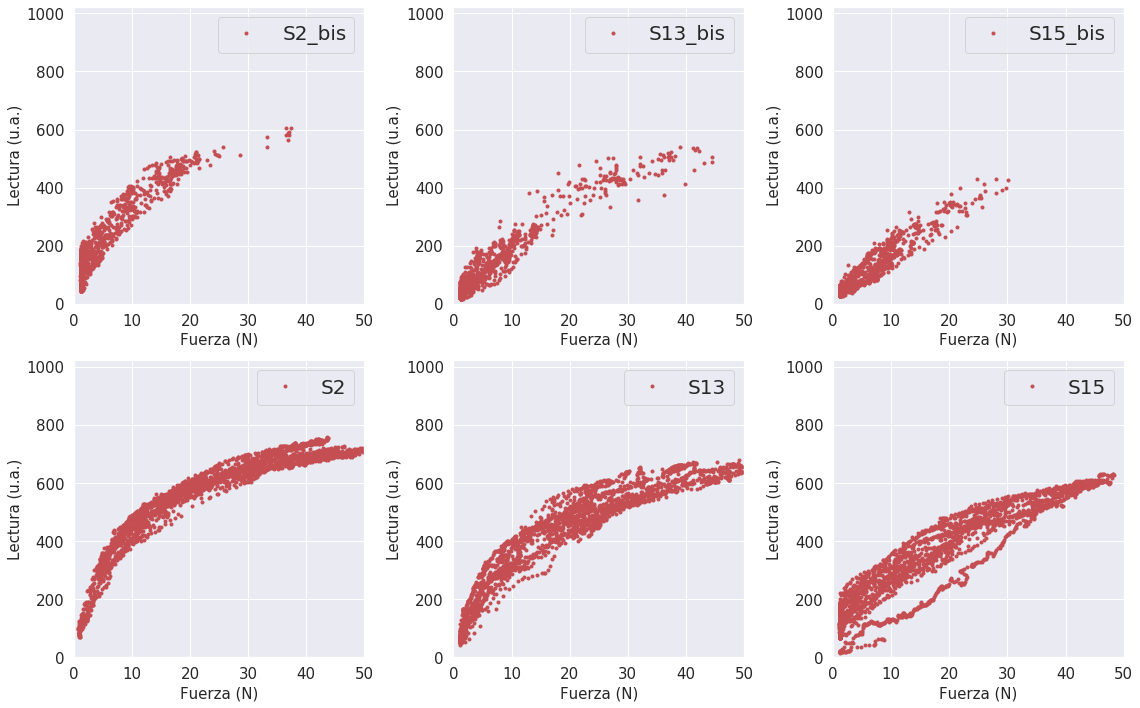

In [0]:
#Tiempo=[]
Fuerza_V = []
Voltaje_S = []
Lectura_S=[]
err_S = 0.143

for i in range(3):
  F = fuerza(databis[i][:,1])
  V = databis[i][:,2]
  V_S, F_V =[], []
  for j in range(len(F)):
    
    if F[j] <= 50.:
      V_S.append(V[j])
      F_V.append(F[j])
  Voltaje_S.append(V_S)
  Lectura_S.append(np.round(np.array(V_S)*1023.0/5.0))
  Fuerza_V.append(F_V)

plt.figure(figsize=(16,10))
for i in range(3):
  plt.subplot(2,3,i+1)
  plt.plot(Fuerza_V[i][ini:fin], Lectura_S[i][ini:fin], 'r.', label='S'+str(sensdata[i])+'_bis')
  plt.xlabel('Fuerza (N)')
  plt.ylabel('Lectura (u.a.)')
  plt.grid()
  plt.xlim(0,50)
  plt.ylim(0,1023)
  plt.legend()
  plt.tight_layout()
  plt.grid()
#plt.grid()

## Grafico el de la calibración común al lado para comparar
#Tiempo=[]
Fuerza_Vc = []
Voltaje_Sc = []
Lectura_Sc=[]
err_Sc = 0.143

for i in range(3):
  Fc = fuerza(data[i][:,1])
  Vc = data[i][:,2]
  V_S, F_V =[], []
  for j in range(len(Fc)):
    
    if Fc[j] <= 50.:
      V_S.append(Vc[j])
      F_V.append(Fc[j])
  Voltaje_Sc.append(V_S)
  Lectura_Sc.append(np.round(np.array(V_S)*1023.0/5.0))
  Fuerza_Vc.append(F_V)

for i in range(3):
  plt.subplot(2,3,i+4)
  plt.plot(Fuerza_Vc[i][ini:fin], Lectura_Sc[i][ini:fin], 'r.', label='S'+str(sensdata[i]))
  plt.xlabel('Fuerza (N)')
  plt.ylabel('Lectura (u.a.)')
  plt.grid()
  plt.xlim(0,50)
  plt.ylim(0,1023)
  plt.legend()
  plt.tight_layout()
  plt.grid()
#plt.grid()
#plt.savefig('comp_calibraciones.png')
plt.show()

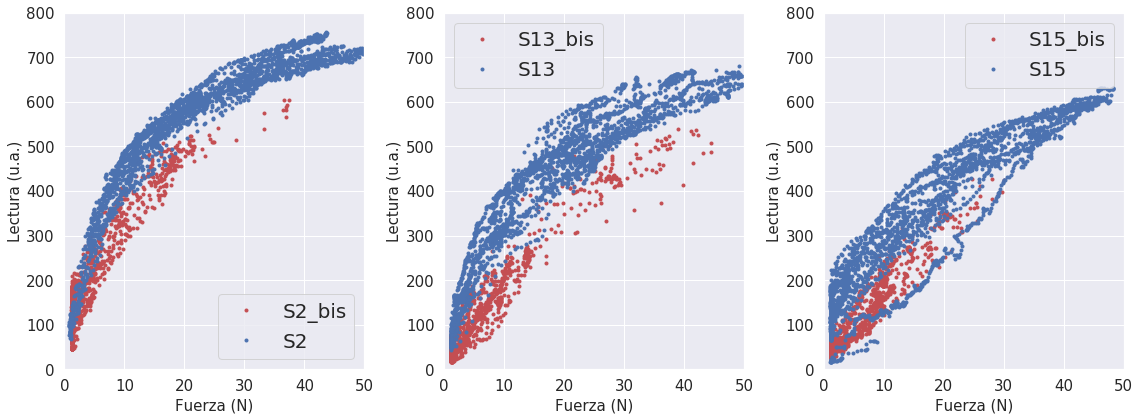

In [0]:
plt.figure(figsize=(16,6))
for i in range(3):
  plt.subplot(1,3,i+1)
  plt.plot(Fuerza_V[i][ini:fin], Lectura_S[i][ini:fin], 'r.', label='S'+str(sensdata[i])+'_bis')
  plt.plot(Fuerza_Vc[i][ini:fin], Lectura_Sc[i][ini:fin], 'b.', label='S'+str(sensdata[i]))
  plt.xlabel('Fuerza (N)')
  plt.ylabel('Lectura (u.a.)')
  plt.grid()
  plt.xlim(0,50)
  plt.ylim(0,800)
  plt.legend()
  plt.tight_layout()
  plt.grid()
#plt.grid()
#plt.savefig('comp_calibraciones_juntos.png')
plt.show()

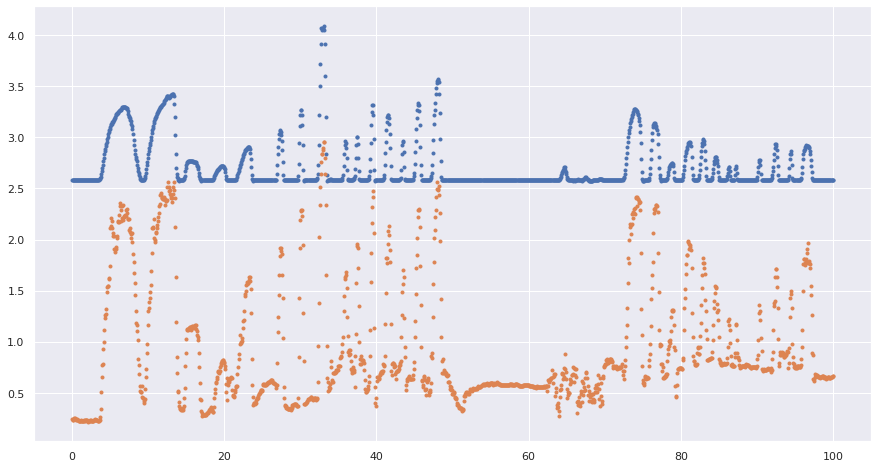

In [0]:
j = 0
ini = 0
fin = 5200
plt.figure(figsize=(15,8))
plt.plot(databis[j][ini:fin,0],databis[j][ini:fin,1],'.')
plt.plot(databis[j][ini:fin,0],databis[j][ini:fin,2],'.')

In [0]:
#Reordena por orden de Fuerza los datos ;)

def takeFirst(elem):
    return elem[0]

def expo(x, d, e, f):
  y = d - (e/f)*(1- np.exp(-f*x))
  #y = f*(1 - e**(-d*x))
  return y

def inversa(y, a, b, c):
  x = (-1/c)*np.log(1+(c/b)*(y-a))
  return x

def df_exp(x,params):
  b=params[1]
  c=params[2]
  df=np.zeros(4)
  df[0]=-b*np.exp(-c*x)
  df[1]=1
  df[2]=-(1-np.exp(-c*x))/c
  df[3]=b*np.exp(-c*x)*(np.exp(c*x)-c*x-1)/(c**2)
  return df

def prediccion_exp(x,error_x,params,cov_params):
    df=df_exp(x,params)
    Y=params[0]-params[1]*(1-np.exp(-params[2]*x))/params[2]
    sigma_Y=np.sqrt((df[0]*error_x)**2+(df[1]**2)*cov_params[0,0]
                    +((df[2]**2)*cov_params[1,1])+((df[3]**2)*cov_params[2,2])
                   +2*df[1]*df[2]*cov_params[0,1]+2*df[1]*df[3]*cov_params[0,2]
                    +2*df[2]*df[3]*cov_params[1,2])
    return(Y,sigma_Y)

def sliding_median(data_array, window):
#    data_array = array(data_array)
    new_list = []
    for i in range(len(data_array)):
        indices = range(max(i - window + 1, 0),
                        min(i + window + 1, len(data_array)))

        med = np.median([data_array[j] for j in indices])
        new_list.append(med)

    return new_list
  
def sliding_mean(data_array, window):
#    data_array = array(data_array)
    new_list = []
    for i in range(len(data_array)):
        indices = range(max(i - window + 1, 0),
                        min(i + window + 1, len(data_array)))
        avg = 0
        for j in indices:
            avg += data_array[j]
        avg /= float(len(indices))
        new_list.append(avg)

    return new_list

[19.591189054982575, 105.14157430745652]


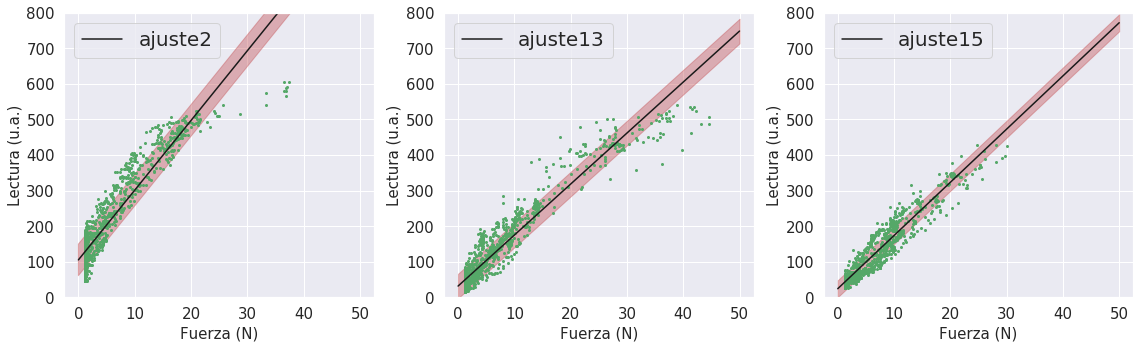

[0.0, 0.0, 0.0]
[0.0, 0.0, 0.0]
[[19.591189054982575, 105.14157430745652], [14.336108396398679, 31.612512888456628], [14.953379904917874, 24.181404538512464]]
[array([[ 0.03789361, -0.17073103],
       [-0.17073103,  2.08907568]]), array([[ 0.01240152, -0.07588543],
       [-0.07588543,  1.26260575]]), array([[ 0.01397763, -0.0784999 ],
       [-0.0784999 ,  0.81962286]])]


In [0]:
def lineal(x, a, b):
  y = a*x + b
  return y

parametros = []
covarianza = []
for i in range(3):
  #err=np.ones(len(Voltaje_ordenado[i]))*err_Voltaje
  popt, pcov = curve_fit(lineal, Fuerza_V[i],list(Lectura_S[i]), p0=[ 1, 5], sigma=err_S*np.ones(len(Lectura_S[i])))#p0=[0, 0.3],
  a,b=popt[0], popt[1]
  parametros.append([a,b])
  covarianza.append(pcov)

i=0
print(parametros[i])
xp=np.linspace(0,50,1001)
#plt.plot(xp,lineal(xp,parametros[i][0],parametros[i][1]), 'k-', label='ajuste'+str(sensdata[i]))

errs3 = []
err_aux = []

for m in range(3):
  err_aux = []
  for j in range(len(Fuerza_V[m])):
    
    y_pred = lineal(Fuerza_V[m][j] ,parametros[m][0],parametros[m][1])
    err_aux.append(np.abs(Lectura_S[m][j] - y_pred))#**2)
  errs3.append(err_aux)
sigma_sensores=[]

for i in range(3):
  sigma_sensores.append(np.sqrt(np.sum(np.array(errs3[i])**2)/(len(errs3[i])-1)))

ms=4

plt.figure(figsize=(16,5))
plt.rc('legend', fontsize=20)
plt.rc('axes', labelsize=15)
plt.rc('xtick', labelsize=15)
plt.rc('ytick', labelsize=15)
for i in range(3): #]:#,]:
  banda_l = lineal(xp,parametros[i][0],parametros[i][1])-sigma_sensores[i]
  banda_u = lineal(xp,parametros[i][0],parametros[i][1])+sigma_sensores[i]
  plt.subplot(1,3,i+1)
  plt.plot(Fuerza_V[i],Lectura_S[i], 'g.', markersize=ms)
  plt.plot(xp,lineal(xp,parametros[i][0],parametros[i][1]), 'k-', label='ajuste'+str(sensdata[i]))
  plt.fill_between(xp, banda_l, banda_u, color='r', alpha=0.4)
  plt.legend()
  #plt.rc('legend', fontsize=25)
  plt.grid()
#  plt.plot(xp,banda_u[i],'g-', alpha=0.8)
#  plt.plot(xp,banda_l[i],'g-', alpha=0.8)
 # plt.fill_between(xp, banda_l[i], banda_u[i], color='g', alpha=0.4)
  plt.xticks([0,10,20,30,40, 50])
  plt.xlabel('Fuerza (N)')
  plt.ylabel('Lectura (u.a.)')
  #plt.rc('axes', labelsize=35)
  #plt.rc('xtick', labelsize=35)
  #plt.rc('ytick', labelsize=35)
  plt.ylim(0,800)
  plt.grid()
  plt.tight_layout()
#plt.savefig('ajuste_lineal.png')
plt.show()

chisq=[]
p_value=[]
p_v=[]
for i in range(3):
  observed_values=scipy.array(np.array(Lectura_S[i]))
  expected_values=scipy.array(lineal(np.array(Fuerza_V[i]),parametros[i][0],parametros[i][1]))

  chisq.append(scipy.stats.chisquare(observed_values, f_exp=expected_values,ddof=2)[0])
  p_value.append(scipy.stats.chisquare(observed_values, f_exp=expected_values,ddof=2)[1])
  p_v.append(1-scipy.stats.chi2.cdf(chisq[-1],len(observed_values)-2))
  
print(p_value)

print(p_v)

print(parametros)
print(covarianza)

[75.07233363303094, -36.498091576890594, 0.06460933903551455]


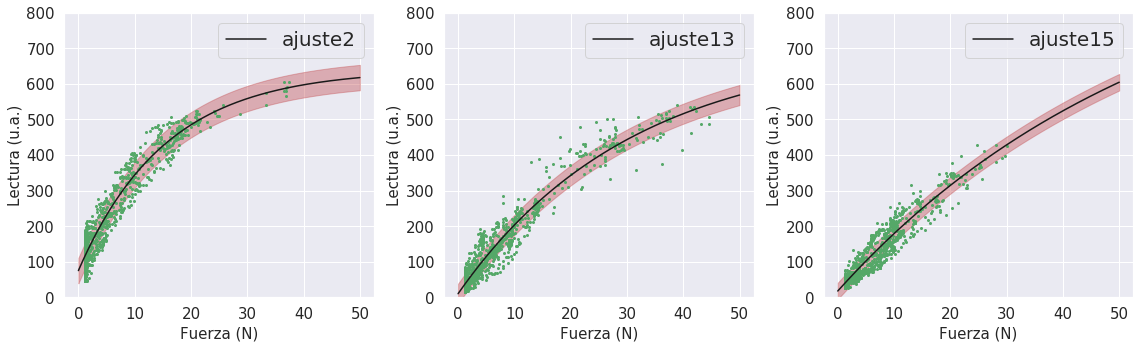

[0.0, 0.0, 0.0]
[0.0, 0.0, 0.0]
[[75.07233363303094, -36.498091576890594, 0.06460933903551455], [10.115984223545363, -22.61770449262454, 0.03254169811547916], [17.718610590559724, -17.57701611164902, 0.017406911989024776]]
[array([[ 3.25490820e+00,  1.31834608e+00, -3.72199797e-03],
       [ 1.31834608e+00,  7.97554539e-01, -2.52385341e-03],
       [-3.72199797e-03, -2.52385341e-03,  8.88251166e-06]]), array([[ 1.63716500e+00,  3.80809645e-01, -1.05755386e-03],
       [ 3.80809645e-01,  1.46717952e-01, -4.71547340e-04],
       [-1.05755386e-03, -4.71547340e-04,  1.75492393e-06]]), array([[ 1.45502321e+00,  3.57652174e-01, -1.70562419e-03],
       [ 3.57652174e-01,  1.32441764e-01, -7.39390569e-04],
       [-1.70562419e-03, -7.39390569e-04,  4.79242371e-06]])]


In [0]:
"""
def expo(x, d, e, f):
  y = d - (e/f)*(1- np.exp(-f*x))
  #y = f*(1 - e**(-d*x))
  return y
"""
parametros = []
covarianza = []
for i in range(3):
  #err=np.ones(len(Voltaje_ordenado[i]))*err_Voltaje
  popt, pcov = curve_fit(expo, Fuerza_V[i],list(Lectura_S[i]), p0=[150, -100, 0.1], sigma=err_S*np.ones(len(Lectura_S[i])))#p0=[0, 0.3],
  d,e,f=popt[0], popt[1], popt[2]
  parametros.append([d,e,f])
  covarianza.append(pcov)

i=0
print(parametros[i])
#plt.plot(xp,expo(xp,parametros[i][0],parametros[i][1],parametros[i][2]), 'k-', label='ajuste'+str(sensdata[i]))

errs3 = []
err_aux = []

for m in range(3):
  err_aux = []
  for j in range(len(Fuerza_V[m])):
    
    y_pred = expo(Fuerza_V[m][j] ,parametros[m][0],parametros[m][1],parametros[m][2])
    err_aux.append(np.abs(Lectura_S[m][j] - y_pred))#**2)
  errs3.append(err_aux)
sigma_sensores=[]

for i in range(3):
  sigma_sensores.append(np.sqrt(np.sum(np.array(errs3[i])**2)/(len(errs3[i])-1)))

ms=4

plt.figure(figsize=(16,5))
plt.rc('legend', fontsize=20)
plt.rc('axes', labelsize=15)
plt.rc('xtick', labelsize=15)
plt.rc('ytick', labelsize=15)
for i in range(3): #]:#,]:
  banda_l = expo(xp,parametros[i][0],parametros[i][1],parametros[i][2])-sigma_sensores[i]
  banda_u = expo(xp,parametros[i][0],parametros[i][1],parametros[i][2])+sigma_sensores[i]
  plt.subplot(1,3,i+1)
  plt.plot(Fuerza_V[i],Lectura_S[i], 'g.', markersize=ms)
  plt.plot(xp,expo(xp,parametros[i][0],parametros[i][1],parametros[i][2]), 'k-', label='ajuste'+str(sensdata[i]))
  plt.fill_between(xp, banda_l, banda_u, color='r', alpha=0.4)
  plt.legend()
  #plt.rc('legend', fontsize=25)
  plt.grid()
#  plt.plot(xp,banda_u[i],'g-', alpha=0.8)
#  plt.plot(xp,banda_l[i],'g-', alpha=0.8)
 # plt.fill_between(xp, banda_l[i], banda_u[i], color='g', alpha=0.4)
  plt.xticks([0,10,20,30,40, 50])
  plt.xlabel('Fuerza (N)')
  plt.ylabel('Lectura (u.a.)')
  #plt.rc('axes', labelsize=35)
  #plt.rc('xtick', labelsize=35)
  #plt.rc('ytick', labelsize=35)
  plt.ylim(0,800)
  plt.grid()
  plt.tight_layout()
#plt.savefig('ajuste_expo.png')
plt.show()

chisq=[]
p_value=[]
p_v=[]
for i in range(3):
  observed_values=scipy.array(np.array(Lectura_S[i]))
  expected_values=scipy.array(expo(np.array(Fuerza_V[i]),parametros[i][0],parametros[i][1],parametros[i][2]))

  chisq.append(scipy.stats.chisquare(observed_values, f_exp=expected_values,ddof=3)[0])
  p_value.append(scipy.stats.chisquare(observed_values, f_exp=expected_values,ddof=3)[1])
  p_v.append(1-scipy.stats.chi2.cdf(chisq[-1],len(observed_values)-3))
  
print(p_value)

print(p_v)

print(parametros)
print(covarianza)

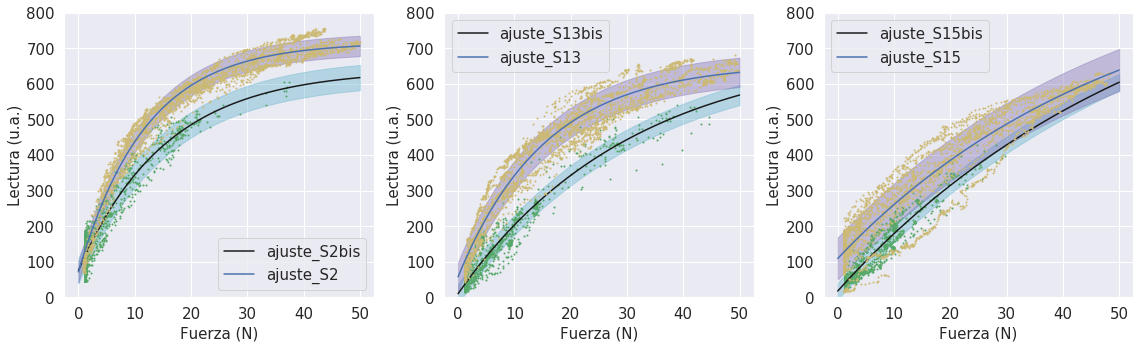

[1.0451090330759595e-167, 0.0, 0.0]
[0.0, 0.0, 0.0]
[[71.526429544518, -53.960598063725215, 0.08369359578630431], [57.7045765773706, -38.58295147116597, 0.06446821283648956], [109.13633886203239, -16.729701086785692, 0.019912534371787294]]
[array([[ 6.92847571e+00,  1.40088990e+00, -1.50157296e-03],
       [ 1.40088990e+00,  3.43067834e-01, -4.25227392e-04],
       [-1.50157296e-03, -4.25227392e-04,  5.88430761e-07]]), array([[ 7.15380865e+00,  1.32630591e+00, -1.90941295e-03],
       [ 1.32630591e+00,  3.26168445e-01, -5.57930442e-04],
       [-1.90941295e-03, -5.57930442e-04,  1.06905999e-06]]), array([[ 6.08804339e+00,  7.60038984e-01, -1.94069603e-03],
       [ 7.60038984e-01,  1.53525941e-01, -4.70545347e-04],
       [-1.94069603e-03, -4.70545347e-04,  1.58926613e-06]])]


In [0]:
#Las dos juntas

parametros1 = []
covarianza1 = []
for i in range(3):
  #err=np.ones(len(Voltaje_ordenado[i]))*err_Voltaje
  popt, pcov = curve_fit(expo, Fuerza_V[i],list(Lectura_S[i]), p0=[150, -100, 0.1], sigma=err_S*np.ones(len(Lectura_S[i])))#p0=[0, 0.3],
  d,e,f=popt[0], popt[1], popt[2]
  parametros1.append([d,e,f])
  covarianza1.append(pcov)

parametros2 = []
covarianza2 = []
for i in range(3):
  #err=np.ones(len(Voltaje_ordenado[i]))*err_Voltaje
  popt, pcov = curve_fit(expo, Fuerza_Vc[i],list(Lectura_Sc[i]), p0=[150, -100, 0.1], sigma=err_S*np.ones(len(Lectura_Sc[i])))#p0=[0, 0.3],
  d,e,f=popt[0], popt[1], popt[2]
  parametros2.append([d,e,f])
  covarianza2.append(pcov)
i=0
#print(parametros[i])
#plt.plot(xp,expo(xp,parametros[i][0],parametros[i][1],parametros[i][2]), 'k-', label='ajuste'+str(sensdata[i]))

errs31 = []
err_aux1 = []

for m in range(3):
  err_aux1 = []
  for j in range(len(Fuerza_V[m])):
    
    y_pred = expo(Fuerza_V[m][j] ,parametros1[m][0],parametros1[m][1],parametros1[m][2])
    err_aux1.append(np.abs(Lectura_S[m][j] - y_pred))#**2)
  errs31.append(err_aux1)
sigma_sensores1=[]

for i in range(3):
  sigma_sensores1.append(np.sqrt(np.sum(np.array(errs31[i])**2)/(len(errs31[i])-1)))

errs32 = []
err_aux2 = []

for m in range(3):
  err_aux2 = []
  for j in range(len(Fuerza_Vc[m])):
    
    y_pred = expo(Fuerza_Vc[m][j] ,parametros2[m][0],parametros2[m][1],parametros2[m][2])
    err_aux2.append(np.abs(Lectura_Sc[m][j] - y_pred))#**2)
  errs32.append(err_aux2)
sigma_sensores2 = []

for i in range(3):
  sigma_sensores2.append(np.sqrt(np.sum(np.array(errs32[i])**2)/(len(errs32[i])-1)))

ms=2

plt.figure(figsize=(16,5))
plt.rc('legend', fontsize=15)
plt.rc('axes', labelsize=15)
plt.rc('xtick', labelsize=15)
plt.rc('ytick', labelsize=15)
for i in range(3): #]:#,]:
  banda_l1 = expo(xp,parametros1[i][0],parametros1[i][1],parametros1[i][2])-sigma_sensores1[i]
  banda_u1 = expo(xp,parametros1[i][0],parametros1[i][1],parametros1[i][2])+sigma_sensores1[i]
  banda_l2 = expo(xp,parametros2[i][0],parametros2[i][1],parametros2[i][2])-sigma_sensores2[i]
  banda_u2 = expo(xp,parametros2[i][0],parametros2[i][1],parametros2[i][2])+sigma_sensores2[i]

  plt.subplot(1,3,i+1)
  plt.plot(Fuerza_V[i],Lectura_S[i], 'g.', markersize=ms)
  plt.plot(xp,expo(xp,parametros1[i][0],parametros1[i][1],parametros1[i][2]), 'k-', label='ajuste_S'+str(sensdata[i])+'bis')
  plt.plot(Fuerza_Vc[i],Lectura_Sc[i], 'y.', markersize=ms)
  plt.plot(xp,expo(xp,parametros2[i][0],parametros2[i][1],parametros2[i][2]), 'b-', label='ajuste_S'+str(sensdata[i]))
  plt.fill_between(xp, banda_l1, banda_u1, color='c', alpha=0.4)
  plt.fill_between(xp, banda_l2, banda_u2, color='m', alpha=0.4)
  plt.legend()
  #plt.rc('legend', fontsize=25)
  plt.grid()
#  plt.plot(xp,banda_u[i],'g-', alpha=0.8)
#  plt.plot(xp,banda_l[i],'g-', alpha=0.8)
 # plt.fill_between(xp, banda_l[i], banda_u[i], color='g', alpha=0.4)
  plt.xticks([0,10,20,30,40, 50])
  plt.xlabel('Fuerza (N)')
  plt.ylabel('Lectura (u.a.)')
  #plt.rc('axes', labelsize=35)
  #plt.rc('xtick', labelsize=35)
  #plt.rc('ytick', labelsize=35)
  plt.ylim(0,800)
  plt.grid()
  plt.tight_layout()
#plt.savefig('ajuste_expo_comp.png')
plt.show()

chisq=[]
p_value=[]
p_v=[]
for i in range(3):
  observed_values=scipy.array(np.array(Lectura_Sc[i]))
  expected_values=scipy.array(expo(np.array(Fuerza_Vc[i]),parametros2[i][0],parametros2[i][1],parametros2[i][2]))

  chisq.append(scipy.stats.chisquare(observed_values, f_exp=expected_values,ddof=3)[0])
  p_value.append(scipy.stats.chisquare(observed_values, f_exp=expected_values,ddof=3)[1])
  p_v.append(1-scipy.stats.chi2.cdf(chisq[-1],len(observed_values)-3))
  
print(p_value)

print(p_v)

print(parametros2)
print(covarianza2)

[-0.473620721382911, 30.13372103784265, 83.75253636664664]


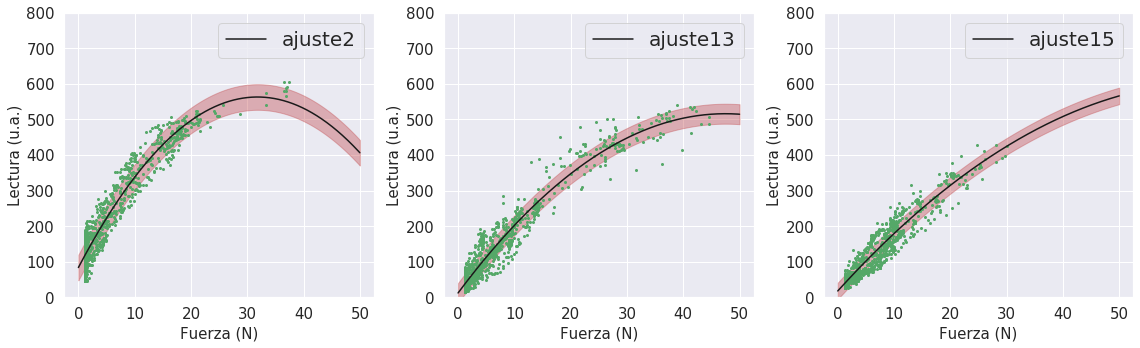

[0.0, 0.0, 0.0]
[0.0, 0.0, 0.0]
[[-0.473620721382911, 30.13372103784265, 83.75253636664664], [-0.22346546272882914, 21.222223969682943, 12.227222581293974], [-0.12920132235219922, 17.426226054207145, 17.869760901624723]]
[array([[ 2.83682080e-04, -6.31460416e-03,  1.28112783e-02],
       [-6.31460416e-03,  1.65377882e-01, -3.96991775e-01],
       [ 1.28112783e-02, -3.96991775e-01,  1.94680148e+00]]), array([[ 6.43862160e-05, -1.98406908e-03,  5.58540656e-03],
       [-1.98406908e-03,  6.93157997e-02, -2.22147152e-01],
       [ 5.58540656e-03, -2.22147152e-01,  1.31697661e+00]]), array([[ 2.25307681e-04, -4.31227176e-03,  1.10065567e-02],
       [-4.31227176e-03,  9.58624180e-02, -2.85510046e-01],
       [ 1.10065567e-02, -2.85510046e-01,  1.31920069e+00]])]


In [0]:
def cuadratica(x, a, b, c):
  y = a*x**2 + b*x + c
  #y = f*(1 - e**(-d*x))
  return y

parametros = []
covarianza = []
for i in range(3):
  #err=np.ones(len(Voltaje_ordenado[i]))*err_Voltaje
  popt, pcov = curve_fit(cuadratica, Fuerza_V[i],list(Lectura_S[i]), p0=[-0.5,40,80], sigma=err_S*np.ones(len(Lectura_S[i])))#p0=[0, 0.3],
  a,b,c=popt[0], popt[1], popt[2]
  parametros.append([a,b,c])
  covarianza.append(pcov)

i=0
print(parametros[i])
#plt.plot(xp,cuadratica(xp,parametros[i][0],parametros[i][1],parametros[i][2]), 'k-', label='ajuste'+str(sensdata[i]))

errs3 = []
err_aux = []

for m in range(3):
  err_aux = []
  for j in range(len(Fuerza_V[m])):
    
    y_pred = cuadratica(Fuerza_V[m][j] ,parametros[m][0],parametros[m][1],parametros[m][2])
    err_aux.append(np.abs(Lectura_S[m][j] - y_pred))#**2)
  errs3.append(err_aux)
sigma_sensores=[]

for i in range(3):
  sigma_sensores.append(np.sqrt(np.sum(np.array(errs3[i])**2)/(len(errs3[i])-1)))

ms=4

plt.figure(figsize=(16,5))
plt.rc('legend', fontsize=20)
plt.rc('axes', labelsize=15)
plt.rc('xtick', labelsize=15)
plt.rc('ytick', labelsize=15)
for i in range(3): #]:#,]:
  banda_l = cuadratica(xp,parametros[i][0],parametros[i][1],parametros[i][2])-sigma_sensores[i]
  banda_u = cuadratica(xp,parametros[i][0],parametros[i][1],parametros[i][2])+sigma_sensores[i]
  plt.subplot(1,3,i+1)
  plt.plot(Fuerza_V[i],Lectura_S[i], 'g.', markersize=ms)
  plt.plot(xp,cuadratica(xp,parametros[i][0],parametros[i][1],parametros[i][2]), 'k-', label='ajuste'+str(sensdata[i]))
  plt.fill_between(xp, banda_l, banda_u, color='r', alpha=0.4)
  plt.legend()
  #plt.rc('legend', fontsize=25)
  plt.grid()
#  plt.plot(xp,banda_u[i],'g-', alpha=0.8)
#  plt.plot(xp,banda_l[i],'g-', alpha=0.8)
 # plt.fill_between(xp, banda_l[i], banda_u[i], color='g', alpha=0.4)
  plt.xticks([0,10,20,30,40, 50])
  plt.xlabel('Fuerza (N)')
  plt.ylabel('Lectura (u.a.)')
  #plt.rc('axes', labelsize=35)
  #plt.rc('xtick', labelsize=35)
  #plt.rc('ytick', labelsize=35)
  plt.ylim(0,800)
  plt.grid()
  plt.tight_layout()
#plt.savefig('ajuste_cuadratica.png')
plt.show()

chisq=[]
p_value=[]
p_v=[]
for i in range(3):
  observed_values=scipy.array(np.array(Lectura_S[i]))
  expected_values=scipy.array(cuadratica(np.array(Fuerza_V[i]),parametros[i][0],parametros[i][1],parametros[i][2]))

  chisq.append(scipy.stats.chisquare(observed_values, f_exp=expected_values,ddof=3)[0])
  p_value.append(scipy.stats.chisquare(observed_values, f_exp=expected_values,ddof=3)[1])
  p_v.append(1-scipy.stats.chi2.cdf(chisq[-1],len(observed_values)-3))
  
print(p_value)

print(p_v)

print(parametros)
print(covarianza)

[-0.0007947322084884891, 1.349277763160262, 137.57708352158616]


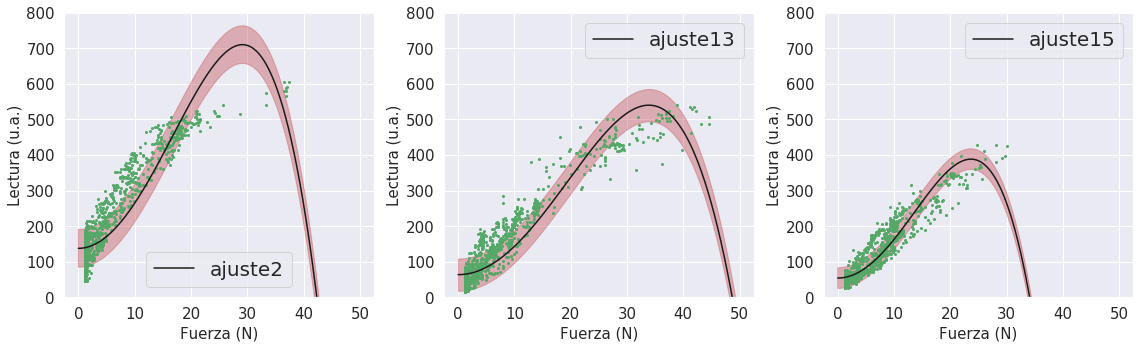

[0.0, 0.0, 0.0]
[0.0, 0.0, 0.0]
[[-0.0007947322084884891, 1.349277763160262, 137.57708352158616], [-0.00036066717753162835, 0.8290345980260592, 63.66256331052224], [-0.0010679635650014268, 1.1950614603909346, 54.0699471268869]]
[array([[ 3.65207635e-10, -3.08948530e-07,  8.50684955e-06],
       [-3.08948530e-07,  3.53542517e-04, -1.22786430e-02],
       [ 8.50684955e-06, -1.22786430e-02,  2.35017592e+00]]), array([[ 8.32530623e-11, -1.02729639e-07,  3.82690299e-06],
       [-1.02729639e-07,  1.46604674e-04, -6.74231277e-03],
       [ 3.82690299e-06, -6.74231277e-03,  1.75655621e+00]]), array([[ 7.61740399e-10, -3.85420995e-07,  1.11988856e-05],
       [-3.85420995e-07,  2.43807833e-04, -8.52758309e-03],
       [ 1.11988856e-05, -8.52758309e-03,  8.94988031e-01]])]


In [0]:
def cuartica(x, a, b, c):
  y = a*x**4 + b*x**2 + c
  #y = f*(1 - e**(-d*x))
  return y

parametros = []
covarianza = []
for i in range(3):
  #err=np.ones(len(Voltaje_ordenado[i]))*err_Voltaje
  popt, pcov = curve_fit(cuartica, Fuerza_V[i],list(Lectura_S[i]), p0=[-1,40,50], sigma=err_S*np.ones(len(Lectura_S[i])))#p0=[0, 0.3],
  a,b,c=popt[0], popt[1], popt[2]
  parametros.append([a,b,c])
  covarianza.append(pcov)

i=0
print(parametros[i])
#plt.plot(xp,cuadratica(xp,parametros[i][0],parametros[i][1],parametros[i][2]), 'k-', label='ajuste'+str(sensdata[i]))

errs3 = []
err_aux = []

for m in range(3):
  err_aux = []
  for j in range(len(Fuerza_V[m])):
    
    y_pred = cuartica(Fuerza_V[m][j] ,parametros[m][0],parametros[m][1],parametros[m][2])
    err_aux.append(np.abs(Lectura_S[m][j] - y_pred))#**2)
  errs3.append(err_aux)
sigma_sensores=[]

for i in range(3):
  sigma_sensores.append(np.sqrt(np.sum(np.array(errs3[i])**2)/(len(errs3[i])-1)))

ms=4

plt.figure(figsize=(16,5))
plt.rc('legend', fontsize=20)
plt.rc('axes', labelsize=15)
plt.rc('xtick', labelsize=15)
plt.rc('ytick', labelsize=15)
for i in range(3): #]:#,]:
  banda_l = cuartica(xp,parametros[i][0],parametros[i][1],parametros[i][2])-sigma_sensores[i]
  banda_u = cuartica(xp,parametros[i][0],parametros[i][1],parametros[i][2])+sigma_sensores[i]
  plt.subplot(1,3,i+1)
  plt.plot(Fuerza_V[i],Lectura_S[i], 'g.', markersize=ms)
  plt.plot(xp,cuartica(xp,parametros[i][0],parametros[i][1],parametros[i][2]), 'k-', label='ajuste'+str(sensdata[i]))
  plt.fill_between(xp, banda_l, banda_u, color='r', alpha=0.4)
  plt.legend()
  #plt.rc('legend', fontsize=25)
  plt.grid()
#  plt.plot(xp,banda_u[i],'g-', alpha=0.8)
#  plt.plot(xp,banda_l[i],'g-', alpha=0.8)
 # plt.fill_between(xp, banda_l[i], banda_u[i], color='g', alpha=0.4)
  plt.xticks([0,10,20,30,40, 50])
  plt.xlabel('Fuerza (N)')
  plt.ylabel('Lectura (u.a.)')
  #plt.rc('axes', labelsize=35)
  #plt.rc('xtick', labelsize=35)
  #plt.rc('ytick', labelsize=35)
  plt.ylim(0,800)
  plt.grid()
  plt.tight_layout()
#plt.savefig('ajuste_cuadratica.png')
plt.show()

chisq=[]
p_value=[]
p_v=[]
for i in range(3):
  observed_values=scipy.array(np.array(Lectura_S[i]))
  expected_values=scipy.array(cuartica(np.array(Fuerza_V[i]),parametros[i][0],parametros[i][1],parametros[i][2]))

  chisq.append(scipy.stats.chisquare(observed_values, f_exp=expected_values,ddof=3)[0])
  p_value.append(scipy.stats.chisquare(observed_values, f_exp=expected_values,ddof=3)[1])
  p_v.append(1-scipy.stats.chi2.cdf(chisq[-1],len(observed_values)-3))
  
print(p_value)

print(p_v)

print(parametros)
print(covarianza)

In [0]:
print(Fuerza_V[m][j])

1.6275663380000012


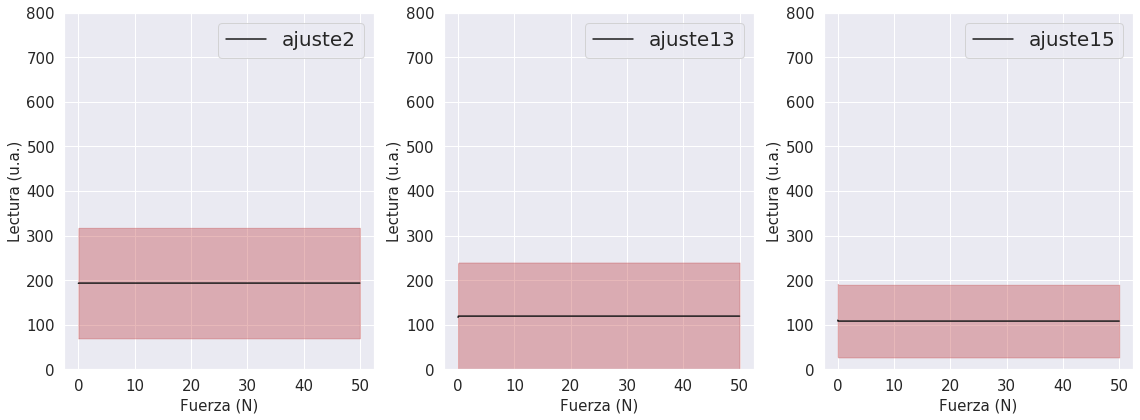

In [0]:
ms=2
xp=np.linspace(0,50,1001)

plt.figure(figsize=(16,6))
plt.rc('legend', fontsize=20)
plt.rc('axes', labelsize=15)
plt.rc('xtick', labelsize=15)
plt.rc('ytick', labelsize=15)
for i in range(3): #]:#,]:
  banda_l = expo(xp,parametros[i][0],parametros[i][1],parametros[i][2])-sigma_sensores[i]
  banda_u = expo(xp,parametros[i][0],parametros[i][1],parametros[i][2])+sigma_sensores[i]
  plt.subplot(1,3,i+1)
  #plt.plot(Fuerza_V[i],Lectura_S[i], 'g.', markersize=ms)
  plt.plot(xp,expo(xp,parametros[i][0],parametros[i][1],parametros[i][2]), 'k-', label='ajuste'+str(sensdata[i]))
  plt.fill_between(xp, banda_l, banda_u, color='r', alpha=0.4)
  plt.legend()
  #plt.rc('legend', fontsize=25)
  plt.grid()
#  plt.plot(xp,banda_u[i],'g-', alpha=0.8)
#  plt.plot(xp,banda_l[i],'g-', alpha=0.8)
 # plt.fill_between(xp, banda_l[i], banda_u[i], color='g', alpha=0.4)
  plt.xticks([0,10,20,30,40, 50])
  plt.xlabel('Fuerza (N)')
  plt.ylabel('Lectura (u.a.)')
  #plt.rc('axes', labelsize=35)
  #plt.rc('xtick', labelsize=35)
  #plt.rc('ytick', labelsize=35)
  plt.ylim(0,800)
  plt.grid()
  plt.tight_layout()

chisq=[]
p_value=[]
p_v=[]
for i in range(3):
  observed_values=scipy.array(np.array(Lectura_S[i]))
  expected_values=scipy.array(expo(np.array(Fuerza_V[i]),parametros[i][0],parametros[i][1],parametros[i][2]))

  chisq.append(scipy.stats.chisquare(observed_values, f_exp=expected_values,ddof=3)[0])
  p_value.append(scipy.stats.chisquare(observed_values, f_exp=expected_values,ddof=3)[1])
  p_v.append(1-scipy.stats.chi2.cdf(chisq[-1],len(observed_values)-3))
  
print(p_value)

print(p_v)

In [0]:
err_porc = []
for j in range(16):
  err_porc.append(round(100*sigma_sensores[j]/min(Lectura_S[j]),0))
  
err_porc[5] = round(100*sigma_sensores[5]/min(Vs_s5),0)
err_porc[6] = round(100*sigma_sensores[6]/min(Vs_s5),0)

print(err_porc)

In [0]:
i = 0
print(sigma_sensores[i])
err_porc = int(100*sigma_sensores[i]/min(Lectura_S[i]))
plt.figure(figsize=(15,10))
plt.rc('legend', fontsize=30)
plt.rc('axes', labelsize=28)
plt.rc('xtick', labelsize=28)
plt.rc('ytick', labelsize=28)
#plt.errorbar(Fuerza_V[i], Lectura_S[i],yerr=sigma_sensores[i], fmt='bo', ecolor='y', markersize=4, label='Sensor '+str(i)+':' +r'$\ \sigma_{\%} \ \leq$'+str(err_porc))
plt.plot(Fuerza_V[i], Lectura_S[i], 'b.', markersize=5, label='Sensor '+str(i)+':' +r'$\ \sigma_{\%} \ \leq$'+str(err_porc))
#plt.plot(Fv_s5, Vs_s5, 'g.', label=r'$\sigma_{\%} \ \leq$'+str(err_porc))
plt.fill_between(xp, expo(xp,parametros[i][0],parametros[i][1],parametros[i][2])-sigma_sensores[i], expo(xp,parametros[i][0],parametros[i][1],parametros[i][2])+sigma_sensores[i], color='r', alpha=0.4, label='Intervalo de confianza')
plt.grid()

plt.plot(xp,expo(xp,parametros[i][0],parametros[i][1],parametros[i][2]), 'k-', linewidth=3, label='Ajuste')
plt.legend(loc='lower right')
plt.xticks([0,10,20,30,40, 50])
#plt.yticks([1,2,3,4,5])
plt.xlabel('Fuerza (N)')
plt.ylabel('Lectura (u.a.)')
plt.xlim(0,50)
plt.ylim(0,1023)
plt.grid()
plt.tight_layout()
#plt.savefig('calib_crudo_s'+str(i)+'.png')
#plt.savefig('calib_s'+str(i)+'.png')
plt.show()

In [0]:
import scipy

In [0]:
chisq=[]
p_value=[]
p_v=[]
for i in range(16):
  observed_values=scipy.array(np.array(Lectura_S[i]))
  expected_values=scipy.array(expo(np.array(Fuerza_V[i]),parametros[i][0],parametros[i][1],parametros[i][2]))

  chisq.append(scipy.stats.chisquare(observed_values, f_exp=expected_values,ddof=3)[0])
  p_value.append(scipy.stats.chisquare(observed_values, f_exp=expected_values,ddof=3)[1])
  p_v.append(1-scipy.stats.chi2.cdf(chisq[-1],len(observed_values)-3))
  
print(p_value)

print(p_v)